In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
Path = os.getcwd()
print(Path)

C:\Users\fmart\Google Drive\Semesters\Spring 2021\Phys Lab\Hydrogen Spectrum & Rydberg Constant


In [44]:
n_2 = 2
Q_num = [3, 4, 5, 6, 7, 8]
balmer = [656.43, 486.57, 436.35, 410.916, 397., 386.571]
error = [.5, .5, 2, .5, .2, 3]
error_adj = [0.000011, 0.000021, 0.00004, 0.0000296, 0.0000126, 0.00002007]

\begin{equation}
y = \Big(\frac{1}{n_2^2} - \frac{1}{n_1^2}\Big)
\end{equation}

In [45]:
y = []
x=[]
xerr=[]
for i in range(len(Q_num)):
    y.append(1/(n_2**2)- 1/(Q_num[i]**2))
    x.append(1/balmer[i])
    xerr.append(error[i])

In [53]:
slope, intercept = np.polyfit(x,y, 1)
xrange = np.linspace(0.0015,0.00265,5000)

func = slope * xrange + intercept

#Units: uT/Amps
print("Slope = " + str(slope))
print("Intercept = " + str(intercept))

expected = []
residuals = []
new_y = []
for i in range(len(x)):
    expected.append(x[i] * slope + intercept)
    residuals.append((expected[i]-y[i])) 
    
expected = np.array(expected)

Slope = 90.62810808945004
Intercept = 0.0012143247428822682


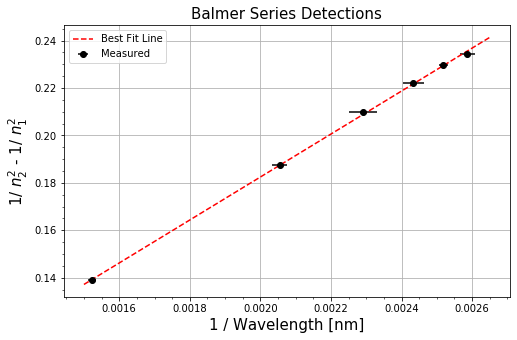

In [51]:
plt.figure(figsize = [8,5])
plt.errorbar(xrange, func, fmt ='--',color = 'red',label='Best Fit Line')
plt.errorbar(x, y, xerr=error_adj, fmt ='o',color = 'black',label='Measured')
plt.grid()
plt.xlabel("1 / Wavelength [nm]", size = 15)
plt.ylabel("1/ $n_2^2$ - 1/ $n_1^2$", size = 15)
plt.title("Balmer Series Detections", size = 15)
plt.legend()
plt.minorticks_on()
plt.savefig(Path + "/Balmer Detections.png",bbox_inches='tight')
plt.show()

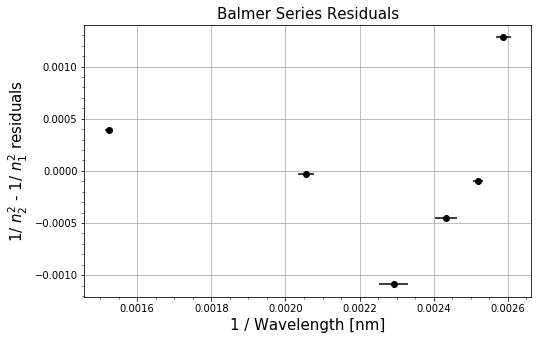

In [52]:
plt.figure(figsize = [8,5])
plt.errorbar(x, residuals, xerr=error_adj,fmt ='o',color = 'black')
plt.grid()
plt.xlabel("1 / Wavelength [nm]", size = 15)
plt.ylabel("1/ $n_2^2$ - 1/ $n_1^2$ residuals", size = 15)
plt.title("Balmer Series Residuals", size = 15)
plt.minorticks_on()
#plt.ylim(-1,1)
plt.savefig(Path + "/Balmer Residuals",bbox_inches='tight')
plt.show()

In [54]:
def Standard_error(x, y, y_predict):
    """"
    x y and y_predict must all be arrays with the same number of elements.
    Returns the error of the slope.
    """  
    
    n = len(x)
    x_avg = np.mean(x)
    top = np.sum((y-y_predict)**2)
    bot = np.sum((x-x_avg)**2)
    result  = np.sqrt(1/(n-2) * top/bot)
    return(result)

In [58]:
#Slope is in inv nm, we can convert this to inv cm by dividing by 9e-4
R_M = slope / 9e-4
R_M_err = Standard_error(x,y,expected) / 9e-4

m = 9.10938356e-31    #Mass of electron in kg
M = 1.6726219e-27     #Mass of proton in kg

Using the equation:

\begin{equation}
    R_M = R_\infty \frac{1}{1+m/M}
\end{equation}

In [59]:
#Calculating the Rydberg Constant
R_inf = R_M*(1 + m/M)
R_inf_err = R_M_err * (1+ m/M)
print("R_inf = "+str(R_inf))
print("R_inf error = "+str(R_inf_err))

#Calculating total error
R_inf_know =  109737.31568508
total_err = (R_inf_know-R_inf)/R_inf_know

print("Our total error is: " +str(round(total_err*100,3)) +"%")

R_inf = 100752.73966630323
R_inf error = 1120.9114909134214
Our total error is: 8.187%
